In [1]:
import tensorflow as tf 
import numpy as np
import pathlib
import matplotlib.pyplot as plt

In [14]:
img_dir = pathlib.Path('../images')
file_list = sorted([str(path) for path in img_dir.glob('*.png')])
file_list

['../images/baseball-player.png',
 '../images/clown-fish.png',
 '../images/elephant.png',
 '../images/forklift.png',
 '../images/ice-cream.png',
 '../images/lemons.png',
 '../images/magnetic-compass.png',
 '../images/polar-bear.png']

Image shape: (421, 600, 3)
Image shape: (2183, 3072, 3)
Image shape: (640, 960, 3)
Image shape: (1195, 1800, 3)
Image shape: (480, 720, 3)
Image shape: (525, 788, 3)
Image shape: (747, 1121, 3)
Image shape: (900, 1350, 3)


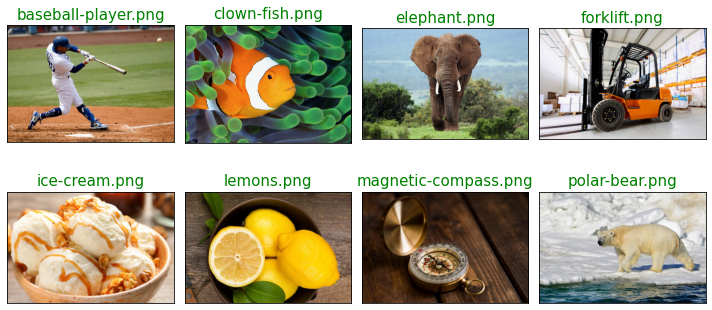

In [20]:
import os

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print(f'Image shape: {img.shape}')
    ax = fig.add_subplot(2, 4, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15, color='green')

plt.tight_layout()
plt.show()

In [29]:
lables = [1 if 'bear' in os.path.basename(file) else 0 for file in file_list]
lables

[0, 0, 0, 0, 0, 0, 0, 1]

In [31]:
custom_ds = tf.data.Dataset.from_tensor_slices((file_list, lables))
for item in custom_ds:
    print(f'{item[0].numpy()} {item[1].numpy()}')

b'../images/baseball-player.png' 0
b'../images/clown-fish.png' 0
b'../images/elephant.png' 0
b'../images/forklift.png' 0
b'../images/ice-cream.png' 0
b'../images/lemons.png' 0
b'../images/magnetic-compass.png' 0
b'../images/polar-bear.png' 1


In [42]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0
    
    return image, label

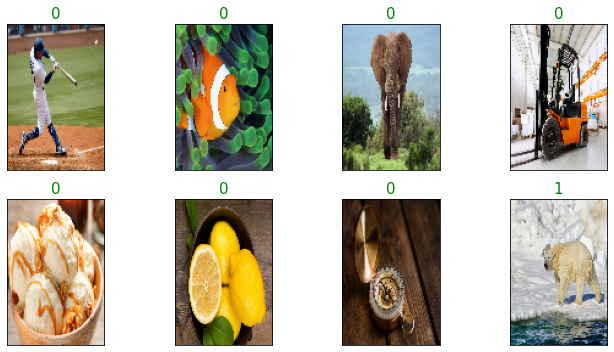

In [43]:
img_height, img_width = 120, 80
custom_labeled = custom_ds.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(custom_labeled):
    ax = fig.add_subplot(2, 4, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(file[0])
    ax.set_title('{}'.format(file[1].numpy()), size=15, color='green')

plt.tight_layout()
plt.show()